# Reading Week Task- Using Least-Squares fit to calculate Hubbles constant $\qquad\qquad\qquad\qquad$ (Student Number: 19052055)

In [1]:
# Code adapted from "PHAS0007 Script for session 5: Notebook 1 (of 2)",(Dash and Lemos, 2019) {3}
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Hides code for easier viewing, Toggle code boxes <a href="javascript:code_toggle()">here</a>.''')

### Introduction:
This notebook is calculating Hubbles constant from graphs of distance against recessional velocity, plotted with least-squares linear fit. Hubbles law  describle's the relation and direct proportionality between the distances and recessional velocity of distant astrological bodies, this is given by:
$$v = H_0D, \qquad[1] $$ 
where $v$ is the recessional velocity ; $D$ is the distance to the body; and $H_0$ is the proportionality constant, Hubble constant- measured in kilometers per second per megaparsec.

Hubbles constant can be estimated via Lemaˆıtre’s procedure, this is done by measuring the distance and recession velocities of type 1a Supernovae. Type 1a supernovas are used as standard candles, as the explode with predictable luminocity, to calculate there distance. in addition, via spectroscopy the line spectrum of supernova is compared with lab references to calculate recessional velocity. We can use then use a linear fitting to calculate the Hubble constant from gradient calculations.

Information taken from "PHAS0007 Reading Week Task 2019 notebook",(Dash and Lemos, 2019) {3}

In [3]:
#Import libraries for notebook:

%matplotlib notebook
# sets plotting style

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
#import for plotting and curve_fit

import pandas as pd
#import for plotting tables


plt.rcParams['figure.figsize'] = 9, 5
# sets graph sizes

### Section 1:

In [4]:
# Code adapted from my submission for PHAS0007 Session 5
#Importing data:

v, d, d_err = np.loadtxt('hubble_data.csv', skiprows=1, dtype='float, float, float', delimiter=',', unpack=True)

# imports data, skip first line as contains text string

data = {'Recession Velocity (Km/s)': v, 'Distance (Mpc)': d, 'Error in Distance (Mpc)': d_err}
table = pd.DataFrame(data=data)
print(table)

# print arrays in table form as easier to veiw, data still in form of arrays as v,d,d_error variables

    Recession Velocity (Km/s)  Distance (Mpc)  Error in Distance (Mpc)
0                 2997.924580       38.974217                13.091990
1                 3597.509496       59.676136                23.056755
2                 4197.094412       58.671629                10.604925
3                 4796.679328       66.636689                11.101744
4                 5696.056702       82.925710                16.318155
5                 6895.226534       97.231124                12.565449
6                 7794.603908      112.310217                15.792488
7                 9293.566198      141.156321                18.449668
8                11092.320950      163.665643                21.403639
9                12891.075690      193.603897                33.497989
10               15289.415360      213.905583                45.757236
11               17987.547480      270.148663                38.621977
12               20985.472060      306.220774                46.451481
13    

#### Initial Plot: 
Graph of the data with errors and no fit


<IPython.core.display.Javascript object>


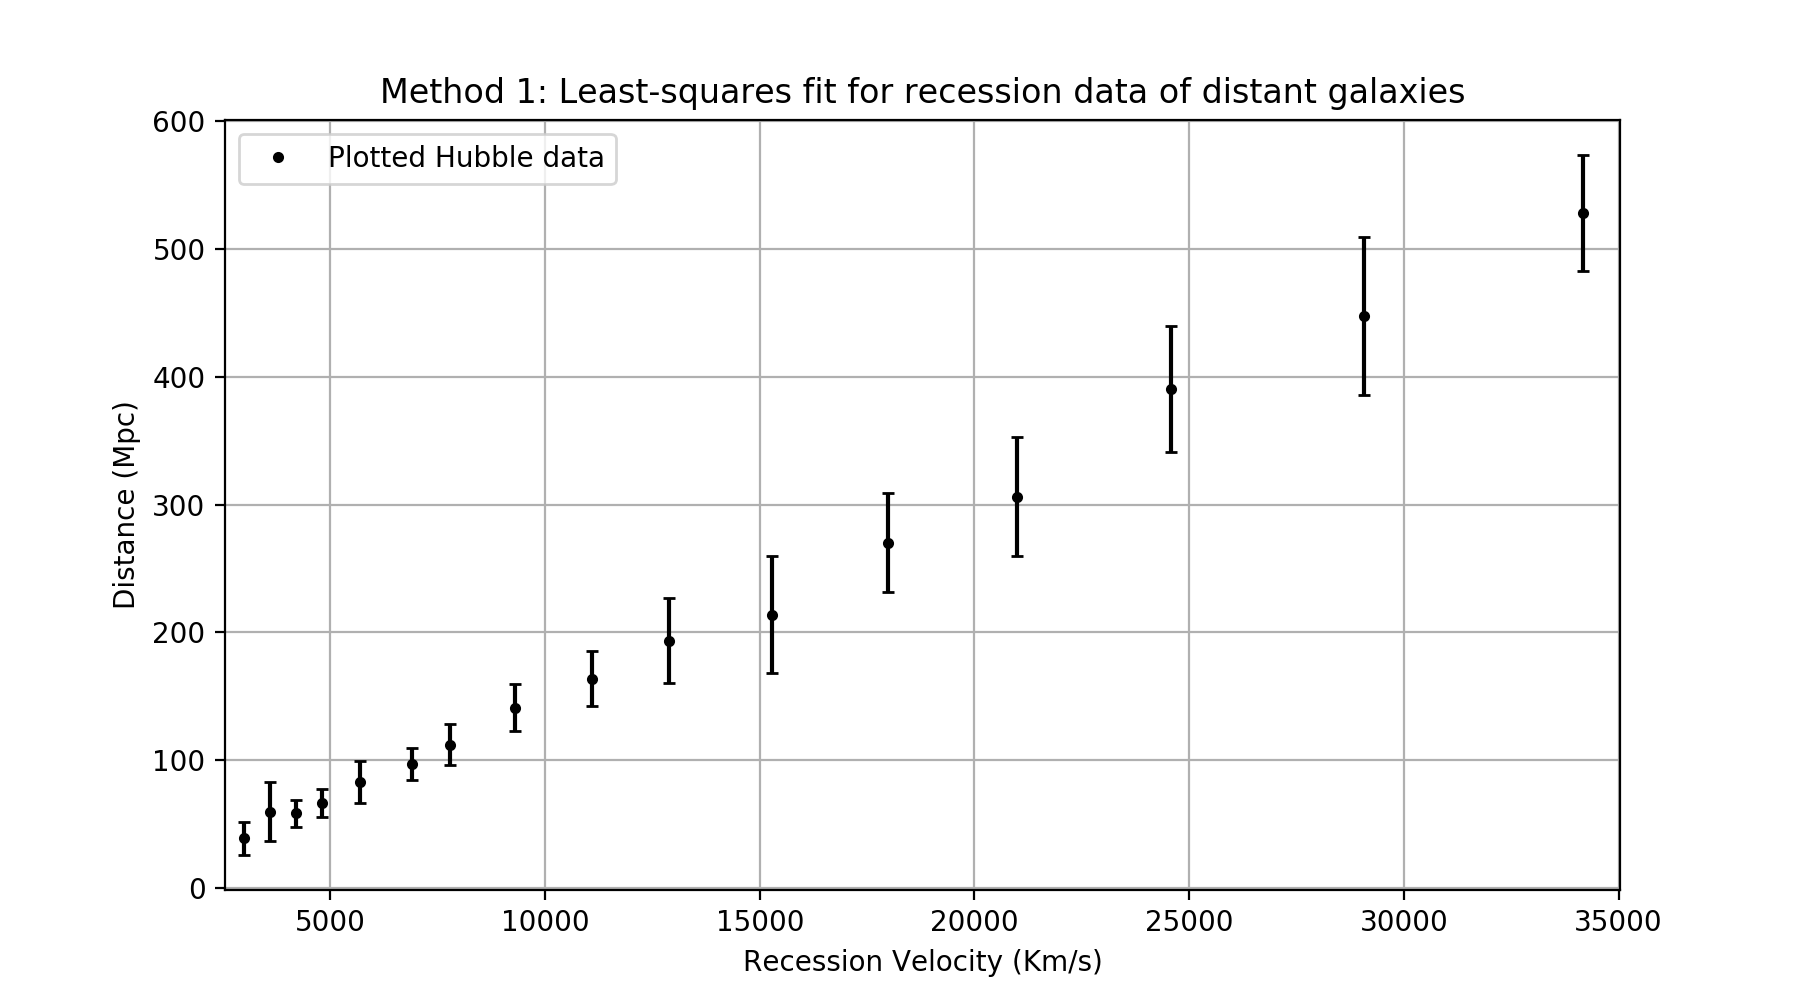

In [5]:
# Plotting code adapted from my submission for PHAS0007 Session 5
# Plotting data and error:

d_min= np.amin(d)
d_max= np.amax(d)
v_min= np.amin(v)
v_max= np.amax(v)           
# set min and max of arrays as variables
                                                       
plt.figure(1) 

plt.xlim(v_min*0.85,v_max*1.025) 
plt.grid(True) 
# set limits of x axis close to max and min of data, and adds gridlines

plt.plot(v, d,'.', color='black', label= 'Plotted Hubble data') 
plt.errorbar(v, d, yerr=d_err, color='black', linestyle='None', capsize=2)
# plots points, error

plt.ylabel('Distance (Mpc)')                         
plt.xlabel('Recession Velocity (Km/s)')                                                  
plt.title('Method 1: Least-squares fit for recession data of distant galaxies')                  
plt.legend(loc='best')
plt.show(); 
# plots labels, titles, and legend

#### Equations for calculation of Unweighted fit:

Formula's to plot Unweighted Least-Squares Linear fit below, are from the PHAS0007 Data Analysis and Statistics booklet (Llorente Garcia et al., 2019){1}.


The fitting parameters/ gradient and intercept for unweighted linear fit is calculated using these two formulas:

$$ m = \frac{\sum_i x_i (y_i - \bar{y})}{\sum x_i (x_i - \bar{x})} \quad[2]$$
                                                                                                                 

$$ c = \bar{y} - m \bar{x} \qquad\qquad [3]$$

The uncertainty in the gradient and intercept is calculated using:

$$ \Delta{m} = \sqrt{ \frac{S}{(n-2)D}} \qquad\qquad[4]$$

$$ \Delta{c} = \sqrt{ (\frac{1}{n} + \frac{ \bar{x}^2}{D}) \frac{S}{(n-2)} } \qquad[5]$$

where S and D are calculated as:

$$ D= \sum_i {(x_i - \bar{x})^2} \qquad\qquad[6]$$

$$S = \sum_i (y_i - mx_i -c)^2 \qquad[7]$$



In [8]:
#Code adapted from my submission for PHAS0007 Session 5 
#Calculating Fitting Parameters for Unweighted Least-Square Linear Fit:

v=[1.0,2.0,3.0,4.0,5.0]
d=[2.9,7.9,8.7,13.9,16.5]


n= np.size(v)
print('No. of data points', n)                                                

# returns the size of the array

d_bar= np.mean(d)
print('Mean distance:', d_bar)

v_bar= np.mean(v)
print('Mean recession velocity:', v_bar,'\n')                                 

# code for mean values

print(np.sum((v-v_bar)**2))

print('\033[1m'+'Unweighted Fitting Parameters:'+'\033[0m')

UWm= np.sum((d - d_bar)*v) / np.sum((v - v_bar)*v)
print('Gradient of unweighted linear fit:', UWm)

UWc= d_bar-(UWm*v_bar)
print('Y-Intercept of unweighted linear fit:', UWc,'\n')                      

# code for gradient and intercept
                                                                  
    
S = np.sum((d - 3.32 * v - 0.02)**2) 
print('Sum of square of residuals:', S)

D= np.sum((v-v_bar)**2)
print('Sum of deviation squared/ D:', D,'\n')                                 

# code for S and D
                                              
    
print('\033[1m'+'Uncertainty in Unweighted Fitting Parameters:'+'\033[0m')

delta_UWm= np.sqrt(S/((n-2)*D))
print('Uncertainty in unweighted gradient', delta_UWm)

delta_UWc= np.sqrt( ( (1/n) + (v_bar**2/D) )*(S/(n-2)) )
print('Uncertainty in unweighted y-intercept', delta_UWc,'\n')                 

# code for griadient and intercept  error                                                                   

No. of data points 5
Mean distance: 9.98
Mean recession velocity: 3.0 

10.0
Unweighted Fitting Parameters:
Gradient of unweighted linear fit: 3.319999999999999
Y-Intercept of unweighted linear fit: 0.020000000000003126 



TypeError: can't multiply sequence by non-int of type 'float'

#### Equations for calculation of Weighted fit:

Formula's to plot Weighted Least-Squares Linear fit below, are from "PHAS0007 Reading Week Task 2019 notebook",(Dash and Lemos, 2019) {3}:


The weighted values are taken as:
$$ w_i = \frac{1}{(\Delta y_i)^2} \qquad[8]$$

The fitting parameters/ gradient and intercept for weighted linear fit is calculated using these two formulas:

$$  m = \frac{\sum_i w_i \sum_i w_i x_i y_i - \sum_i w_i x_i \sum_i w_i
y_i}{\delta} \qquad[9]$$
    
$$ c = \frac{\sum_i w_i x_i^2 \sum_i w_i y_i - \sum_i w_i x_i \sum_i w_i x_i y_i}{\delta} \qquad[10]$$


The uncertainty in the gradient and intercept is calculated using:

$$ \Delta m = \sqrt{ \frac{\sum_i w_i}{\delta}} \qquad[11]$$


$$ \Delta c = \sqrt{ \frac{\sum_i x_i^2 w_i}{\delta}} \qquad[12]$$


Where $\delta$ is calculated as:
$$ \delta = \sum_i w_i \sum_i w_i x_i^2 - \left(\sum_i w_i x_i \right)^2 \qquad[13]$$

In [6]:
#Calculating Fitting Parameters for Unweighted Least-Square Linear Fit:

w= (1/d_err**2)
print('Weight of each distance:\n', w,'\n')     

delta= np.sum(w)*np.sum(w*(v**2))-((np.sum(w*v))**2)
print('Value of delta:', delta, '\n')                                         
# code for weight of data points and delta


print('\033[1m'+'Weighted Fitting Parameters:'+'\033[0m')

Wm= ((np.sum(w)*np.sum(w*v*d))-(np.sum(w*v)*np.sum(w*d)))/delta
print('Gradient of weighted linear fit:', Wm)

Wc= ((np.sum(w*(v**2))*np.sum(w*d))-(np.sum(w*v)*np.sum(w*v*d)))/delta
print('Y-Intercept of weighted linear fit:', Wc,'\n')                           
# code for gradient and intercept


print('\033[1m'+'Uncertainty in Weighted Fitting Parameters:'+'\033[0m')

delta_Wm= np.sqrt(np.sum(w)/delta)
print('Uncertainty in weighted gradient:', delta_Wm)

delta_Wc= np.sqrt(np.sum(w*(v**2))/delta)
print('Uncertainty in weighted y-intercept:', delta_Wc)                          
# code for uncertainty in fitting parameters

Weight of each distance:
 [0.0058343  0.00188106 0.0088917  0.00811368 0.00375541 0.0063335
 0.00400958 0.0029378  0.00218285 0.00089117 0.00047762 0.0006704
 0.00046345 0.0004147  0.00026238 0.00048293] 



TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

#### Plotting from calculations: 
Distance is plotted against velocity, with the relative error bars. Then the fitting parameters are used to plot both weighted and unweighted linear fits. This is down by generating an array of two velocity values and then using $y=mx+c$ line equation to generate fit lines.

In [ ]:
#Plotting code adapted from my submission for PHAS0007 Session 5
#Plotting data and both weighted and unweight recession linear fits:

v_line= np.linspace(v_min*0.85,v_max*1.025, 2)

# using the max/ min of v to generate and array used to plot the least-squares fit line

UWd_line1 = UWm*v_line + UWc     #unweighted

Wd_line1 = Wm*v_line + Wc        #weighted

# generating array of corresponding d values for weighted and unweighted least-squares fit line

plt.figure(2) 
# plot the data points together with the linear fit

plt.xlim(v_min*0.85,v_max*1.025) 
plt.grid(True) 

# set limits of x axis close to max and min of data, and adds gridlines
 
plt.plot(v, d,'.', color='black', label= 'Plotted Hubble data') 
plt.errorbar(v, d, yerr=d_err, color='black', linestyle='None', capsize=2)

plt.plot(v_line, UWd_line1,'-',  color='red', label='Unweighted Least-Squares Linear fit')
plt.plot(v_line, Wd_line1,'-',  color='blue', label='Weighted Least-Squares Linear fit')

# plots points, error, and best square fit lines unweighted/ weighted

plt.ylabel('Distance (Mpc)')                         
plt.xlabel('Recession Velocity (Km/s)')                                                  
plt.title('Method 1: Least-squares fit for recession data of galaxies from calculations ')                  
plt.legend(loc='best')    
plt.show(); 

# plots labels title and legend

print('\033[1m'+'Unweighted Fitting Parameters:'+'\033[0m')
print('Gradient of unweighted linear fit= ({0} \xb1 {1}) Mpcs/Km'.format(UWm, delta_UWm))
print('Y-Intercept of unweighted linear fit = ({0} \xb1 {1}) Mpc'.format(UWc, delta_UWc))
# print unweighted fit parameters with their errors

print('\n')                                                          

print('\033[1m'+'Weighted Fitting Parameters:'+'\033[0m')
print('Gradient of unweighted linear fit= ({0} \xb1 {1}) Mpcs/Km'.format(Wm, delta_Wm))
print('Y-Intercept of unweighted linear fit= ({0} \xb1 {1}) Mpc'.format(Wc, delta_Wc))
# print weighted fit parameters with their errors

### Section 2:

#### Plotting using poly_fit:
Poly_fit produces a polynomial of nth degree to points (x, y);we are fitting a polynomial of degree 1 for a line $y=mx+c$. Poly_fit produces a vector of coefficients, for straignt line m and c, that minimises the squared error. It also produces a covariance matrix for (x,y), from which the uncertainties of slope and intercept can be obtained. 

###### Importance of `cov= scale`:

To compute the correct error it is important to have correct `cov='scale'`/ `cov='unscale'` statement. If `cov` is used and not False, poly_fit produces the coefficients and also covariance matrix of (x,y) variables. By default, the weights are taken to be unreliable, therfore everything is scaled such that $\tilde{\chi}^2$ is reduced . However, the scaling can be omitted if `cov='unscaled'`, this is relavent as for the weighted fit sigma is a reliable estimate of the uncertainty, so no scaling is used for the weighted fit.

###### The fitting parameters are giving in the arrays produced by poly_fit such that:

The gradient is the first element of fit: m = `fit[0]` 

The intercept is the second element of fit: c= `fit[1]`
 
###### The uncertainties of fit parameters are obtained from the diagonal elements of the covariance matrix, thus producing arrays where:

The uncertainty of the gradient is `dfit[0]`

The uncertainty of the intercept is `dfit[1]`

(Information taken from "PHAS0007 Script for linear fitting using Python” (Llorente-Garcia, 2019) {2} and website source {5})

In [ ]:
#Code adapted from "PHAS0007 Script for linear fitting using Python” (Llorente-Garcia, 2019){2} 
#Linear fit parameters using poly_fit function:

degree = 1                                                                 
# degree of polynomial


# Unweighted fit:

UWfit, UWcvm = np.polyfit(v,d,degree,cov='scaled')                         
# unweighted fit function produces array of fitting parameters and covariance matrix for line y=mx+c (scaled)

UWdfit = [np.sqrt(UWcvm[i,i]) for i in range(2)]                     
# unweighted fitting parameters uncertainties extracted from covariance matrix to create array 

print('\033[1m'+'Unweighted Fitting Parameters:'+'\033[0m')

print ('Matrix of covariance for the unweighted fit:\n', UWcvm, '\n')
print ('Array of optimized fitting parameters for the unweighted fit [m,c]:', UWfit)
print ('Array of uncertainties for fitting parameters [m,c]:', UWdfit,'\n')
# print unweighted fit parameters with their errors, taken from corresponding arrays


# Weighted fit:   

w2 = 1/d_err
# weighting of data points, calculated as 1/sigma for Gaussian uncertainties 
                                                              
Wfit, Wcvm = np.polyfit(v,d,degree,w=w2,cov='unscaled')     
# weighted fit function produces array of fitting parameters and covariance matrix for line y=mx+c (unscaled)

Wdfit = [np.sqrt(Wcvm[i,i]) for i in range(2)]
# weighted fitting parameters uncertainties extracted from covariance matrix to create array 

print('\033[1m'+'Weighted Fitting Parameters:'+'\033[0m')

print ('Matrix of covariance for the weighted fit:\n', Wcvm,'\n')
print ('Array of optimized fitting parameters for the weighted fit [m,c]:', Wfit)
print ('Array of uncertainties for fitting parameters [m,c]:', Wdfit,'\n')
# print weighted fit parameters with their errors, taken from corresponding arrays

In [7]:
#Code adapted from "PHAS0007 Script for linear fitting using Python” (Llorente-Garcia, 2019){2} 
#Plotting unweighted and weighted linear fit from poly_fit function:

v_line2= v_line 

# use same v_line array to plot the least-squares fit line from method 1

UWd_line2 = UWfit[0]*v_line + UWfit[1]     #unweighted                 

Wd_line2 = Wfit[0]*v_line + Wfit[1]        #weighted                      

# generating array of corresponding d values for weighted and unweighted least-squares fit line


plt.figure(3)                                                      
# plot the data points together with the linear fit

plt.xlim(v_min*0.85,v_max*1.025) 
plt.grid(True) 
# set limits of x axis close to max and min of data, and adds gridlines

plt.plot(v, d, '.', color='grey', label= 'Plotted Hubble data')
plt.errorbar(v, d, yerr = d_err, color='grey', fmt="none", linewidth=1, capsize=3)

plt.plot(v_line, UWd_line2, color='orange', zorder=-1, label='Unweighted Linear fit')
plt.plot(v_line, Wd_line2, color='green', zorder=-1, label='Weighted Linear fit')

# plots points, error, and best square fit lines weighted/ unweighted

plt.ylabel('Distance (Mpc)')                         
plt.xlabel('Recession Velocity (Km/s)')                                                  
plt.title('Method 2: Least-squares fit for recession data of galaxies using poly_fit')                  
plt.legend(loc='best')    
plt.show(); 
# plots labels, title, and legend


print('\033[1m'+'Unweighted Fitting Parameters:'+'\033[0m')
print('Gradient of unweighted linear fit= ({0} \xb1 {1}) Mpcs/Km'.format(UWfit[0], UWdfit[0]))
print('Y-Intercept of unweighted linear fit = ({0} \xb1 {1}) Mpc'.format(UWfit[1], UWdfit[1]))  
# print fit unweighted parameters with their errors

print('\n')     

print('\033[1m'+'Weighted Fitting Parameters:'+'\033[0m')
print('Gradient of weighted linear fit= ({0} \xb1 {1}) Mpcs/Km'.format(Wfit[0], Wdfit[0]))
print('Y-Intercept of weighted linear fit = ({0} \xb1 {1}) Mpc'.format(Wfit[1], Wdfit[1]))                       
# print fit weighted parameters with their errors

NameError: name 'v_line' is not defined

### Section 3:

#### Plotting using curve_fit function:

Curve_fit is used to fit functions to data, using least-squares fit. The function here has been defined as $y=mx+c$ and thus we get linear least-squares fit for our data. Similar to poly_fit, it returns a array of the fitting parameters and a convarience matrix. More information on the matrix is below, however, again we can decode the covariance matrix to extract an array of the uncertainties on the fitting parameters

The curve_fit function used is in the form: `fit= curve_fit(f,x,y, sigma=y_err, absolute_sigma=True)`, where:

`f,` is the model function in the input- the function takes the independent variable as the first argument and the fitting parameters to be optimised.

`x,y` are the independent and dependent data as arrays

`sigma= y_err,` is used to determines the uncertainty in fitting parameters, this is as the function attempts to optimize sigma (where sigma depends on the dimension), here we have a 2d sigma so obtain a covariance matrix of uncertainties. 

`absolute_sigma= True` is used to denote absolute values of sigma are used and the covariance matrix reflects these absolute values.

(Information taken from "PHAS0007 Reading Week Task 2019 notebook",(Dash and Lemos, 2019) {3} and website source {6})

#### Convience Matrix:

In this context the covariance matrix contains the covariance between nth and m-th elements of our two variables. The covariance matrix is just generalizes notion for variance in 2-d (meaning variance of two joint variables). In 2-d the variance cannot be given as a single number, or variance in x and y direection instead a 2x2 matrix used to give the two-dimensional variation. Each element along columns and rows therefore on the diagonal of the covariance matrix is the variance of one of the variables- this is then extracted and then used to calculate uncertainties.

(Information from website source {7})

In [ ]:
#Adapted code from "PHAS0007 Reading Week Task 2019 notebook",(Dash and Lemos, 2019) {3}
#Linear fit parameters using scipy's curve_fit function:

def straight_line(x,m,c):
    '''Calculates a straight line y = mx+c'''
    y = m*x + c                                                    
    return y
# create a function for equation for straight line to use in curve_fit


# Unweighted fit:
UWopt, UWcov = curve_fit(straight_line,v,d)    
# UWopt outputs optimized parameters for the unweighted fit as array
# UWcovn outputs matrix of covariance for the unweighted fit

UWdelta = [np.sqrt(UWcov[i,i]) for i in range(2)]
# extracts unweighted fitting parameters uncertainty from matrix of covarience
 
    
print('\033[1m'+'Unweighted Fitting Parameters:'+'\033[0m')

print ('Matrix of covariance for the unweighted fit:\n', UWcov, '\n')
print ('Array of optimized fitting parameters for the unweighted fit [m,c]:', UWopt)
print ('Array of uncertainties for fitting parameters [m,c]:', UWdelta,'\n')
#prints arrays for fitting parameters and uncertainty, and prints covariance matrix


# Weighted fit 
Wopt,Wcov = curve_fit(straight_line,v,d, sigma=d_err, absolute_sigma=True)
# UWopt outputs optimized parameters for the weighted fit as array
# UWcovn outputs matrix of covariance for the weighted fit

Wdelta = [np.sqrt(Wcov[i,i]) for i in range(2)]                
# extracts weighted fitting parameters uncertainty from matrix of covarience


print('\033[1m'+'Weighted Fitting Parameters:'+'\033[0m')

print ('Matrix of covariance for the weighted fit:\n', Wcov,'\n')
print ('Array of optimized fitting parameters for the weighted fit [m,c]:', Wopt)
print ('Array of uncertainties for fitting parameters [m,c]:', Wdelta,'\n')
#prints arrays for fitting parameters and uncertainty, and prints covariance matrix

In [ ]:
#Plotting unweighted and weighted linear fit from curve_fit function:

v_line3= v_line   
# use same v_line array to plot the least-squares fit line from method 1

UWd_line3 = UWopt[0]*v_line + UWopt[1]     #unweighted                  

Wd_line3 = Wopt[0]*v_line + Wopt[1]        #weighted                      
# generating array of corresponding d values for weighted and unweighted least-squares fit line

plt.figure(4)                                                   
# plot the data points together with the linear fit

plt.xlim(v_min*0.85,v_max*1.025) 
plt.grid(True) 
# set limits of x axis close to max and min of data, and adds gridlines

plt.plot(v, d, '.', color='blue', label= 'Plotted Hubble data')
plt.errorbar(v, d, yerr = d_err, color='blue', fmt="none", linewidth=1, capsize=3)

plt.plot(v_line, UWd_line3, color='black', zorder=-1, label='Unweighted Linear fit')
plt.plot(v_line, Wd_line3, color='yellow', zorder=-1, label='Weighted Linear fit')
# plots points, error, and best square fit lines weighted/ unweighted

plt.ylabel('Distance (Mpc)')                         
plt.xlabel('Recession Velocity (Km/s)')                                                  
plt.title('Method 3: Least-squares fit for recession data of galaxies using curve_fit')                  
plt.legend(loc='best')   
plt.show(); 
# plots labels, title, and legend

print('\033[1m'+'Unweighted Fitting Parameters:'+'\033[0m')
print("Gradient of unweighted linear fit= ({0} \xb1 {1}) Mpcs/Km".format(UWopt[0], UWdelta[0]))
print("Y-Intercept of unweighted linear fit = ({0} \xb1 {1}) Mpc".format(UWopt[1], UWdelta[1]))   
# print fit unweighted parameters with their errors
                    
print('\n')     

print('\033[1m'+'Weighted Fitting Parameters:'+'\033[0m')
print('Gradient of weighted linear fit= ({0} \xb1 {1}) Mpcs/Km'.format(Wopt[0], Wdelta[0]))
print('Y-Intercept of weighted linear fit = ({0} \xb1 {1}) Mpc'.format(Wopt[1], Wdelta[1]))                       
# print fit weighted parameters with their errors

### Section 4:

In [ ]:
#outputing all methods fitting parameters

print('\033[1m'+ 'Method 1- Fitting Parameters:'+'\033[0m')
print('\033[1m'+'\t Unweighted Fitting Parameters:'+'\033[0m')
print('\t Gradient of unweighted linear fit= ({0} \xb1 {1}) Mpcs/Km'.format(UWm, delta_UWm))
print('\t Y-Intercept of unweighted linear fitt = ({0} \xb1 {1}) Mpc'.format(UWc, delta_UWc))
                                                                       
print('\n')                                                          

print('\033[1m'+'\t Weighted Fitting Parameters:'+'\033[0m')
print('\t Gradient of unweighted linear fit= ({0} \xb1 {1}) Mpcs/Km'.format(Wm, delta_Wm))
print('\t Y-Intercept of unweighted linear fit= ({0} \xb1 {1}) Mpc'.format(Wc, delta_Wc))



print('\n') 



print('\033[1m'+ 'Method 2- Fitting Parameters:'+'\033[0m')
print('\033[1m'+'\t Unweighted Fitting Parameters:'+'\033[0m')
print("\t Gradient of unweighted linear fit= ({0} \xb1 {1}) Mpcs/Km".format(UWfit[0], UWdfit[0]))
print("\t Y-Intercept of unweighted linear fitt = ({0} \xb1 {1}) Mpc".format(UWfit[1], UWdfit[1]))  

print('\n')     

print('\033[1m'+'\t Weighted Fitting Parameters:'+'\033[0m')
print('\t Gradient of weighted linear fit= ({0} \xb1 {1}) Mpcs/Km'.format(Wfit[0], Wdfit[0]))
print('\t Y-Intercept of weighted linear fitt = ({0} \xb1 {1}) Mpc'.format(Wfit[1], Wdfit[1]))    



print('\n')    



print('\033[1m'+ 'Method 3- Fitting Parameters:'+'\033[0m')
print('\033[1m'+'\t Unweighted Fitting Parameters:'+'\033[0m')
print('\t Gradient of unweighted linear fit= ({0} \xb1 {1}) Mpcs/Km'.format(UWopt[0], UWdelta[0]))
print('\t Y-Intercept of unweighted linear fitt = ({0} \xb1 {1}) Mpc'.format(UWopt[1], UWdelta[1]))   

print('\n')     

print('\033[1m'+'\t Weighted Fitting Parameters:'+'\033[0m')
print('\t Gradient of weighted linear fit= ({0} \xb1 {1}) Mpcs/Km'.format(Wopt[0], Wdelta[0]))
print('\t Y-Intercept of weighted linear fitt = ({0} \xb1 {1}) Mpc'.format(Wopt[1], Wdelta[1])) 

In [ ]:
#outputting in table for better comparision

M=['Fitting Parameters:','Method 1:','Method 2:','Method 3:']
# column labels

Gap=['','','','']
# array for gaps

L1=['Unweighted Gradient(Mpcs/Km)','Uncertainty in Gradient(Mpcs/Km)',
    'Unweighted Y-intercept(Mpc)','Uncertainty in Y-intercept(Mpc)']
# row labels for unweighted fits

UWgrad= [L1[0],UWm,UWfit[0],UWopt[0]]
# array for gradient of unweighted linear fits
 
UWugrad= [L1[1],delta_UWm,UWdfit[0],UWdelta[0]]
# array for uncertainty in gradient of unweighted linear fits

UWy= [L1[2],UWc,UWfit[1],UWopt[1]]
# array for y-intercept of unweighted linear fits

UWuy= [L1[3],delta_UWc,UWdfit[1],UWdelta[1]]          
#  array for uncertainty in y-intercept of unweighted linear fits

L2=['Weighted Gradient(Mpcs/Km)','Uncertainty in Gradient(Mpcs/Km)',
    'Weighted Y-intercept(Mpc)','Uncertainty in Y-intercept(Mpc)']
# row labels for weighted fits

Wgrad= [L2[0],Wm,Wfit[0],Wopt[0]]
# array for gradient of weighted linear fits

 
Wugrad= [L2[1],delta_Wm,Wdfit[0],Wdelta[0]]
# array for uncertainty in gradient of weighted linear fits

Wy= [L2[2],Wc, Wfit[1],Wopt[1]]
# array y-intercept of unweighted linear fits

Wuy= [L2[3],delta_Wc, Wdfit[1],Wdelta[1]]     
# array for uncertainty in y-intercept of unweighted linear fits'

UW= [M, UWgrad, UWugrad, UWy, UWuy, Gap, Wgrad, Wugrad, Wy, Wuy]
# array for table layout, layout of rows

fig, ax = plt.subplots()
# plotting table

fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
# removes axis from table

ax.table(cellText=UW, loc='center')
plt.title('Table of comparasion of Fitting Parameters')
fig.tight_layout()
plt.show(); 
# plots UW array as table, adds title and rescales table



#### Analysis of Methods:
My prefered method is method 2, poly_fit function, as it is succinct, easily adapted and can be applied to other polynomial functions. Method 1 requires a large amount of coding and is hard to adapt for other functions, as well as, being only for linear fits. Moreover, although Method 3, curve_fit function, is equally succinct and can be adapted for any function, it can be difficuilt to define and implement custom function.

In [ ]:
#Outputing method 2 graph and result to appropriate precision, as preferred method

print('\033[1m'+ 'Method 2- Fitting Parameters to appropriate precision:'+'\033[0m')

print('\033[1m'+'\t Unweighted Fitting Parameters:'+'\033[0m')

print('\t Gradient of unweighted linear fit= ({0:.4f} \xb1 {1:.4f}) Mpcs/Km'.format(UWfit[0], UWdfit[0]))
print('\t Y-Intercept of unweighted linear fitt = ({0:.0f} \xb1 {1:.0f}) Mpc'.format(UWfit[1], UWdfit[1]))  

print('\n')     

print('\033[1m'+'\t Weighted Fitting Parameters:'+'\033[0m')

print('\t Gradient of weighted linear fit= ({0:.4f} \xb1 {1:.4f}) Mpcs/Km'.format(Wfit[0], Wdfit[0]))
print('\t Y-Intercept of weighted linear fitt = ({0:.0f} \xb1 {1:.0f}) Mpc'.format(Wfit[1], Wdfit[1]))    

plt.figure(3) #plots method 2 graph from above
plt.show(); 


#### Precision of Final fitting parameters:
The final quoted fitting parameters are taken from Method 2; the uncertainty is quoted to one significant figurem(as uncertainty is an estimate and therfore the precision beyond 1sf cannot be known), the parameter values are then give to the same number of decimal places as the uncertainty (as futher figures are unreliable).

In [ ]:
UWr= (d - UWfit[0]*v - UWfit[1])
print('Unweighted fit residuals:',UWr)

Wr= (d - Wfit[0]*v - Wfit[1])
print('Weighted fit residuals:',Wr)
# calculating residuals of weighted and unweighted fit
 
plt.figure(6)                                                       
plt.grid(True) 
# plot graph and grides
      
plt.plot(v, UWr, '.', color='black', label= 'Unweighted residuals')
plt.plot(v, Wr, '.', color='red', label= 'Weighted residuals')
#plot weighted and unweighted residuals against velocity

plt.axhline(linewidth=0.5,ls='solid', color= 'r'); 
# adds a line along y=0
    
plt.xlabel('Recession velocity (Km/s)')                         
plt.ylabel('Residual values')                                                  
plt.title('Residual Plot')                  
plt.legend(loc='best')
plt.show(); 
#adds title, axis labels and legend

#### Residuals

Residuals were calculated using formula below, 

$$ d_i = y_i - mx_i -c \qquad[14]$$

The residuals are plotted against ressesion velocity value of the each residuals. The graph of the residuals shows a random distribution, equally above and below zero point; at low velocities/small distances the residuals are generally tight around zero showing good linear fit, however, as velocity(and therefore distance )increase the points disperse out, this would indicate that linear fit is not a good fit. However, this dispersion could be due to the increased uncertainty in distance at larger distance. This makes it harder to decern if it a linear constant expansion rate or if just uncertainty in readings.

Overal, I would say that a linear fit is a good fit and the distribution of residuals around zero is still small enough to conclude it follows a linear fit and variation is accounted for by uncertainties.

### Section 5:

Calculation Hubbles constant:
We can use equation [1] ( $ v = H_0D $ )  taken from  "PHAS0007 Reading Week Task 2019 notebook",(Dash and Lemos, 2019) {3} and rearrange to calculate hubbles constand and the uncertainty from the gradient:
  
We ploted:
  
$$ D= \frac{1}{H_0}v \qquad[15]$$
  
If we compare with the linear fit function, $ y=mx+c $, we get that:
 
$$ m= \frac{1}{H_0} \quad c=0  \qquad[16]$$
  
And therefore:

$$H_0= \frac{1}{m} \qquad[17]$$

$$ \Delta H_0= |H_0| \frac{\Delta m}{|m|} \qquad[18] $$
  
Error of $H_0$ comes from error propagation: $$If \quad  Z=A^n \quad, then,\quad |\Delta Z|=|\frac{\delta Z}{\delta A}|\Delta A \quad=> \quad \frac{ \Delta Z}{|Z|} =|n| \frac{ \Delta A}{|A|}$$
 

In [ ]:
#hubbles constant from method 2

UWh= 1/UWfit[0] 
Wh= 1/Wfit[0]

delta_UWh= UWh*(UWdfit[0]/UWfit[0]) 
delta_Wh= Wh*(Wdfit[0]/Wfit[0])


print('\033[1m'+'Raw Hubbles constants values :'+'\033[0m')
print('Hubbles constant from unweighted fit= ({0} \xb1 {1}) Km/s/Mpc'.format(UWh, delta_UWh))
print('Hubbles constant from weighted fit= ({0} \xb1 {1}) Km/s/Mpc'.format(Wh, delta_Wh))

print('\n')

print('\033[1m'+'Hubble constants values to appropriate accuracy:'+'\033[0m')
print('Hubbles constant from unweighted fit= ({0:.1f} \xb1 {1:.1f}) Km/s/Mpc'.format(UWh, delta_UWh))
print('Hubbles constant from weighted fit= ({0:.0f} \xb1 {1:.0f}) Km/s/Mpc'.format(Wh, delta_Wh))




#### More appropriate: 
I would say the weighted fit is more appropriate, this is because if we look at equation [16] we can see that the y-intercept should be zero but in both fits we get values for the y-intercept(this implies systematic error which is most likely from the distance uncertainty); however, unlike the unweighted fit, the weight fits uncertainty includes zero in its range. This indicates that the weighted fit is more accurate as the uncertainty accounts for the systematic error. Moreover, we can see that this uncertainty propergates to our $ \Delta H_0$, the unweighted $\Delta H_0$ is to small for the galaxtic scale of origanal measurements.

### Section 6:

##### Significance:
Hubbles constant is most significant for the universe for two main reasons; first, the inverse of the Hubbles constant can give us a estimation for the age of the universe(when converted to the same units), assuming a constant expansion from the big bang (which is not necessarily the case); secondly, looking at the expansion rate over time (using the decreasing parameter defined as  $ q= \big(1+ \frac{\dot{H}}{H_0^2} $) we can correlate it to the shape of the universe/ all of space-time, and the 'fate' fate of the universe. The expansion rate is due to the energy density of the whole universe; if there is a large energy density of the universe, the universe is spherical/ closed and that the universe would recolapse at some point in time- this would correlate decrasing expansion rate. If energy density is low we get a saddle shaped universe, this would result in increased expansion rate which would lead to heat death of the universe. Lastly, at critical energy density gives a flat universe in which the expansion is at a constant rate.

In [ ]:
# Age of the universe calculations

age= (Wfit[0])*(3.08567*10**22)/(1000)
age_delta= (Wdfit[0])*(3.08567*10**22)/(1000)

y_age= age/(3600*24*365)
y_age_delta= age_delta/(3600*24*365)

print('\033[1m'+'The age of the universe in seconds:'+'\033[0m ({0:0.2} \xb1 {1:0.1}) s'.format(age, age_delta))
print('\033[1m'+'The age of the universe in years:'+'\033[0m ({0:0.3} \xb1 {1:0.1}) years'.format(y_age, y_age_delta))


### References:
{1} Llorente Garcia, I., Jones, P., and Skipper, N., (2019). _Data analysis and statistics
booklet, PHAS0007_. UCL Moodle.https://moodle.ucl.ac.uk/course/view.php?id=16941&section=1.

{2} Llorente Garcia, I., (2019). _“PHAS0007 Script for linear fitting using Python”_. Moodle resource available from https://moodle.ucl.ac.uk/course/view.php?id=16941&section=4 \[accessed 06 November 2019\]

{3} Dash, L., and Lemos, P., (2019). _"PHAS0007 Reading Week Task 2019: Using least-squares fitting to calculate the Hubble constant"_. UCL Moodle resource available from https://moodle.ucl.ac.uk/course/view.php?id=10648&section=13 \[accessed 06 November 2019\]

{4} Dash, L., and Lemos, P., (2019). _"PHAS0007 Script for session 5: Notebook 1 (of 2)"_. UCL Moodle resource available from https://moodle.ucl.ac.uk/course/view.php?id=10648&section=7 \[accessed 06 November 2019\]

{5} https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html \[accessed 06 November 2019\]

{6} https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html \[accessed 06 November 2019\]

{7} https://en.wikipedia.org/wiki/Covariance_matrix#Covariance_matrix_as_a_parameter_of_a_distribution \[accessed 06 November 2019\]